In [ ]:
import pandas as data_analysis_lib
import numpy as numerical_computing_lib
import matplotlib.pyplot as visualization_engine
import seaborn as statistical_visualization
from sklearn.cluster import KMeans as GroupingAlgorithm
from sklearn.preprocessing import StandardScaler as DataNormalizer

In [ ]:


df = data_analysis_lib.read_csv('archive.zip')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


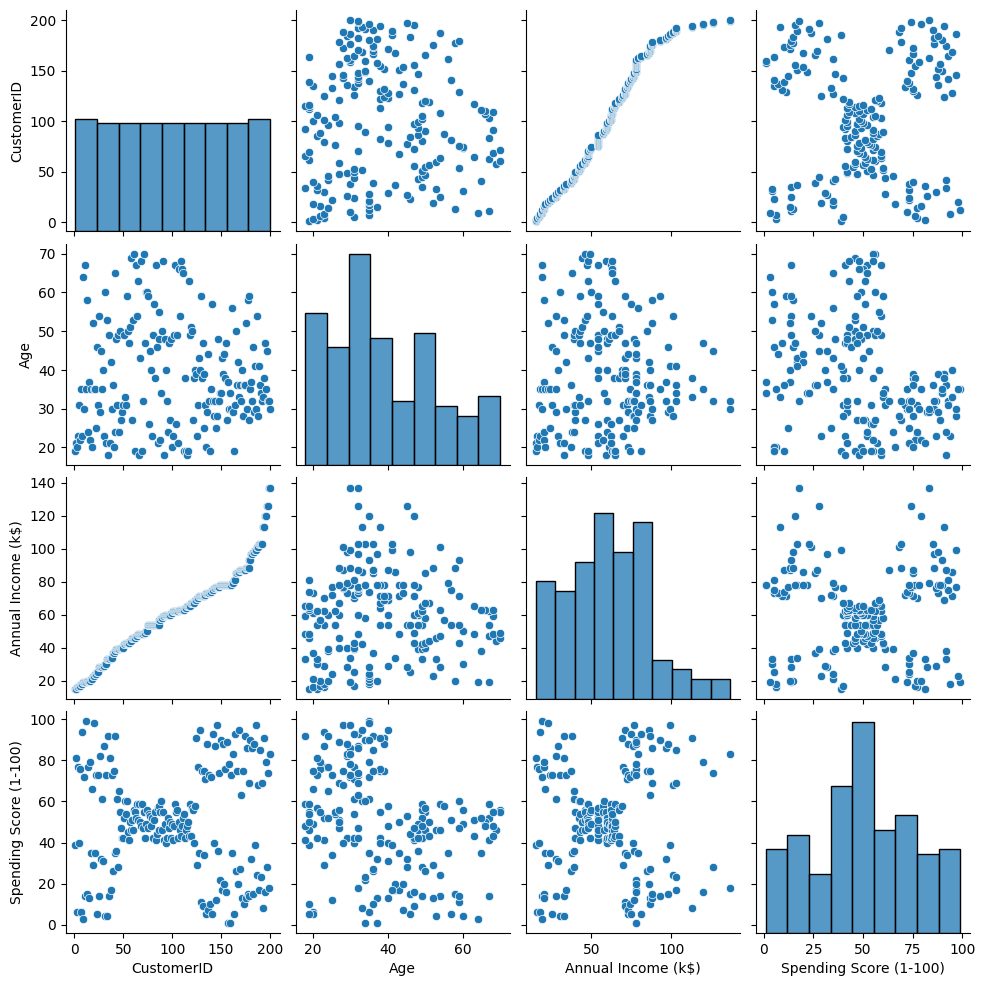

In [ ]:
df.info()
df.describe()
statistical_visualization.pairplot(df)

In [ ]:
customer_features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
standard_scaler = DataNormalizer()
scaled_features = standard_scaler.fit_transform(customer_features)

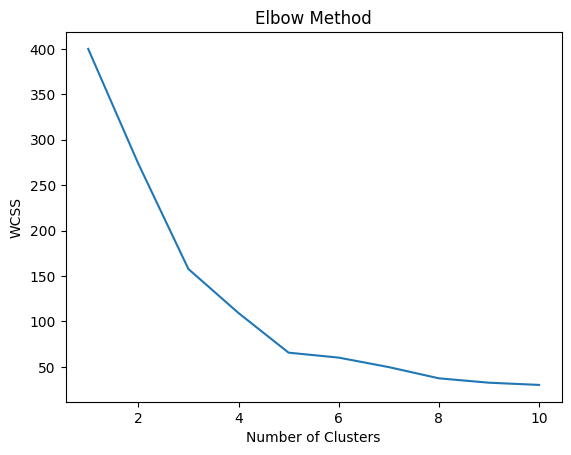

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = GroupingAlgorithm(n_clusters=i, random_state=42) # Use the alias GroupingAlgorithm
  kmeans.fit(scaled_features) # Corrected the variable name to scaled_features
  wcss.append(kmeans.inertia_)

# Plot the elbow method after the loop
visualization_engine.plot(range(1,11), wcss) # Use the alias visualization_engine
visualization_engine.title('Elbow Method') # Setting the title once
visualization_engine.xlabel('Number of Clusters') # Adding x-axis label for clarity
visualization_engine.ylabel('WCSS')
visualization_engine.show()

In [ ]:
# Use the imported alias GroupingAlgorithm instead of KMeans
customer_segmenter = GroupingAlgorithm(n_clusters=5, random_state=42)
customer_segments = customer_segmenter.fit_predict(scaled_features)
# Assuming customer_data is meant to be the original df, add the segment column to df
df['Segment'] = customer_segments

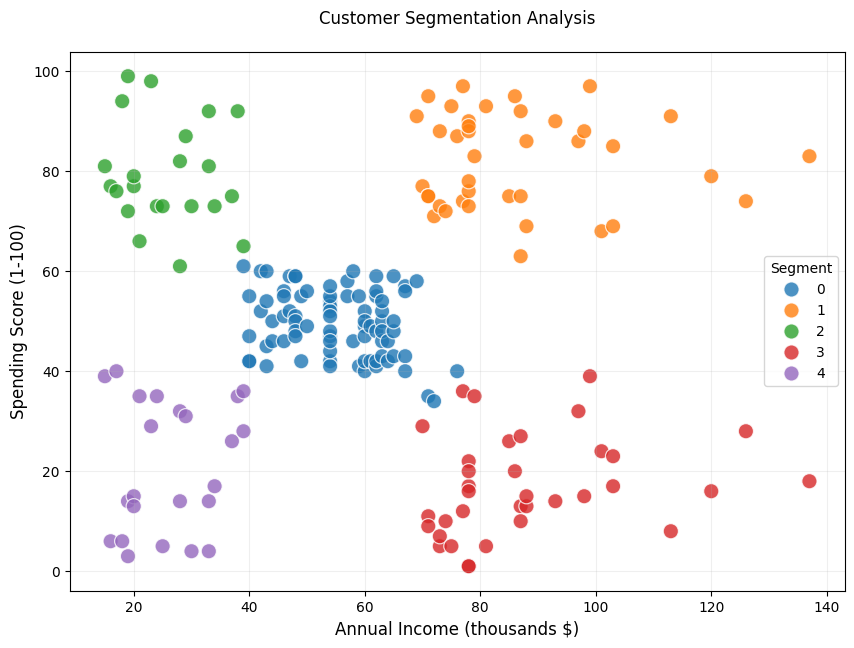

In [ ]:
# Use the imported alias GroupingAlgorithm instead of KMeans
customer_segmenter = GroupingAlgorithm(n_clusters=5, random_state=42)
customer_segments = customer_segmenter.fit_predict(scaled_features)
# Assuming customer_data is meant to be the original df, add the segment column to df
df['Segment'] = customer_segments

# Use the alias visualization_engine for matplotlib.pyplot
visualization_engine.figure(figsize=(10, 7))
customer_plot = statistical_visualization.scatterplot( # Use the correct alias
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Segment',
    data=df, # Use the correct variable name
    palette='tab10',
    s=120,
    alpha=0.8
)
visualization_engine.title('Customer Segmentation Analysis', pad=20)
visualization_engine.xlabel('Annual Income (thousands $)', fontsize=12)
visualization_engine.ylabel('Spending Score (1-100)', fontsize=12)
visualization_engine.grid(alpha=0.2)
visualization_engine.show()